# Subproject 3 – Clustering for Iris datasets
Fasegun Babatunde Oyeniyi (a91647)

Machine Learning – M.Sc. in Electrical and Computer Engineering, ISE,
University of Algrave, Faro, Portugal

## Introduction

In this subproject, clustering algorithms are used on the Iris dataset to group samples based on feature values rather than class labels during training. The core approach is K-Means clustering, utilizing feature scaling due to its distance-based nature. The Elbow Method is used to establish the appropriate number of clusters, while Principal Component Analysis (PCA) is employed for visualization. Finally, the clustering results are evaluated by calculating the Silhouette Score from the clusters.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Loading the Iris Dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

## Exploratory Data Analysis (EDA)

Before preprocessing, I examined the Iris dataset's basic structure and sample rows. I then used summary statistics and basic distribution plots to determine how each feature was distributed.

i extracted the features out from the datsaet

In [3]:
X = iris.data

i used the shape property to get the shape of the data

In [4]:
#  shape of the data

X.shape

(150, 4)

I created a pandas Dataframe table that showed the feature names and the the first 5 rows using .head()

In [5]:
feature_names = list(iris.feature_names)

df_features = pd.DataFrame(X, columns=iris.feature_names)
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Iris data features visualization 

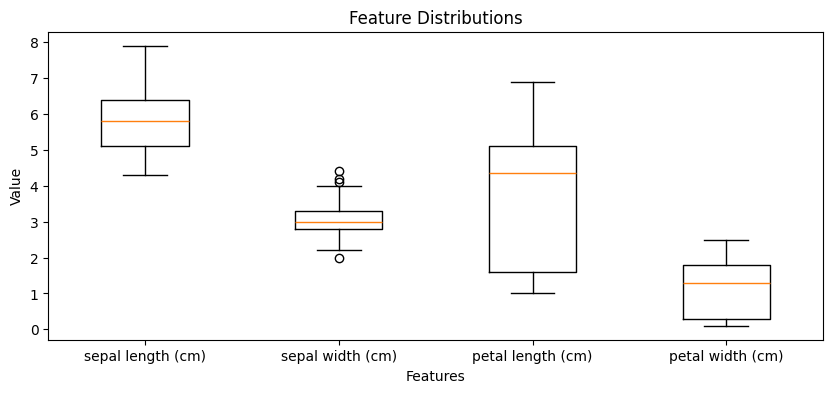

In [6]:
plt.figure(figsize=(10, 4))
plt.boxplot([df_features[col].values for col in feature_names], tick_labels=feature_names)
plt.title("Feature Distributions")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

Petal features vary far more than sepal features, and sepal width has a few outliers. Since K-Means is distance-based, these bigger ranges would end up driving the clustering, therefore I standardize the features first to keep them on the same scale.

# Data preprocessing

Before running K-Means, I standardized the Iris features because the variables have different ranges and K-Means relies on distance. Without scaling, the larger-variation features (especially the petal measurements) would dominate the clustering. There, i used StandardScaler to transform each features.

## Feature Scaling

I used StandardScaler to put all the features on the same scale. So instead of something like petal length (which spreads out more) dominating the distance calculations, K-Means treats each feature more fairly, and they all contribute evenly even though their original ranges were different.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = scaler.fit_transform(X)

features_scaled = pd.DataFrame(features_scaled, columns=iris.feature_names)
features_scaled


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# Model training

## K-Means: Elbow Method

Before doing clustering for the Iris data using means, when defining the n_clusters parameter for the KMeans() method intead of using an arbitary value, i used the elbow method to get the right value of clusters in the Iris dataset.

In [8]:
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

k_values = np.array(list(k_range))
inertias_np = np.array(inertias, dtype=float)

points = np.column_stack((k_values, inertias_np))

p1, p2 = points[0], points[-1]
line_vec = p2 - p1
line_vec = line_vec / np.linalg.norm(line_vec)

vec_from_p1 = points - p1
proj = (vec_from_p1 @ line_vec)[:, None] * line_vec
perp = vec_from_p1 - proj
distances = np.linalg.norm(perp, axis=1)

k_value = int(k_values[np.argmax(distances)])


## Calculating the Clusters using k from above

I used the number of cluster derived from using the elbow method which wich will be the n_clusters.  The n_init runs the K-Means 10 times to find the best results.

In [9]:
kmeans = KMeans(
    n_clusters=k_value,
    random_state=42,
    n_init=10
)

derived_clusters = kmeans.fit_predict(features_scaled)
derived_clusters 
derived = pd.DataFrame()
derived["derived"] = derived_clusters
derived


,derived
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


# PCA (Principal Component Analysis)

PCA stands for Principal Conponent Analysis, a technique that is used in Machine Learning for reducing the dimentionality of features (reduction from large features to smaller features) while keelping as much deatils as possible. the first principal components has the most variantion.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

features_pca = pca.fit_transform(features_scaled)

features_pca = pd.DataFrame(
    features_pca,
    columns=pca.get_feature_names_out()
)

features_pca.head()

,pca0,pca1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


## Visualization of PCAs for the clusters


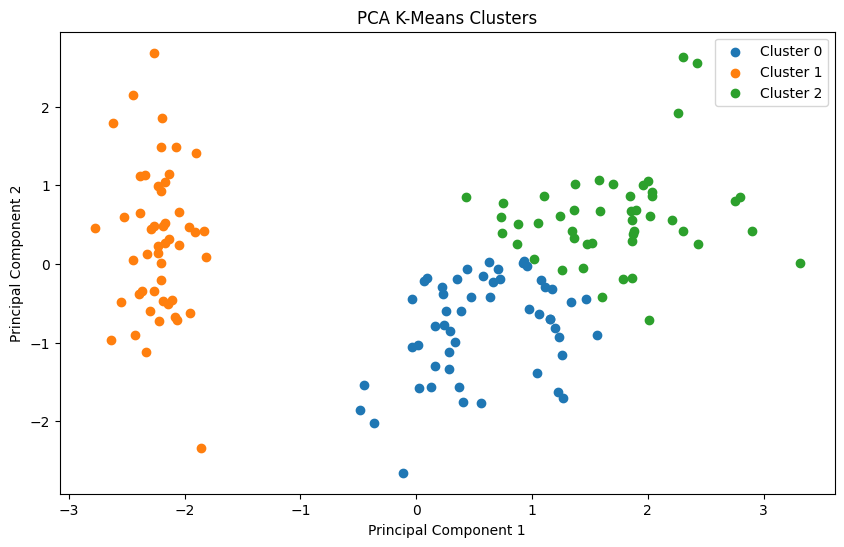

In [11]:
plt.figure(figsize=(10, 6))

for cluster in np.unique(derived_clusters):
    plt.scatter(
        features_pca.loc[derived_clusters == cluster, "pca0"],
        features_pca.loc[derived_clusters == cluster, "pca1"],
        label=f"Cluster {cluster}"
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA K-Means Clusters")
plt.legend()
plt.show()


The separation along Principal Component 1 is strong: the orange cluster is isolated to the left, indicating that one group is clearly distinguishable in the original feature space after standard scaling.
The blue and green clusters occupy overlapping regions, indicating that the two groups have similar measurable traits; this is consistent with Iris, where Versicolor and Virginica are more difficult to distinguish.
The dispersion inside clusters indicates intra-cluster variance: orange is compact, while blue/green are more diffuse. K-Means fits a tidy cluster plus two fuzzier ones.
Because this is a PCA with two components, overlap may be related to dimensionality reduction.

## Visualization: True Species

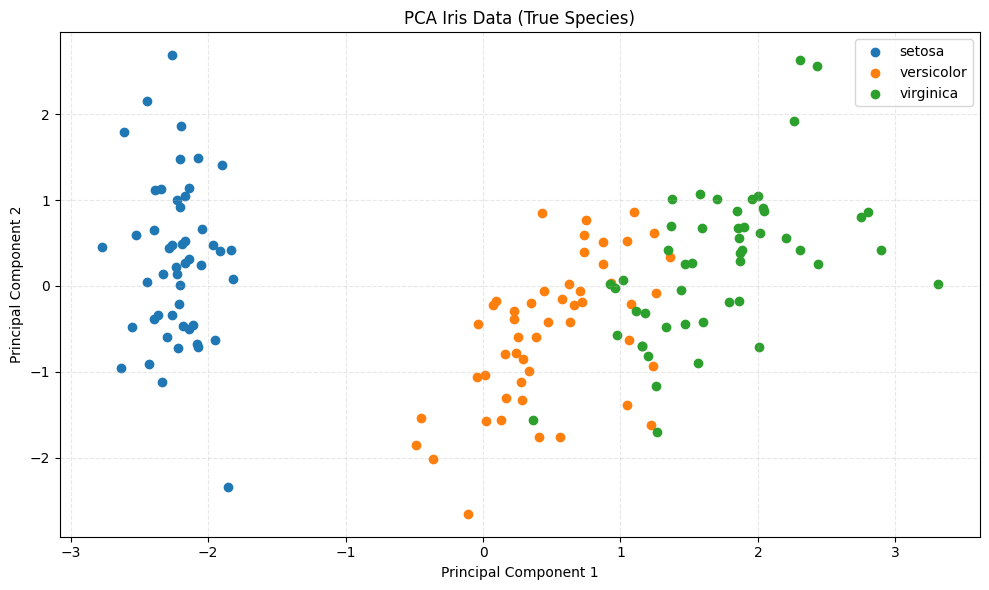

In [12]:
y = iris.target
target_names = iris.target_names

plt.figure(figsize=(10, 6))

for label in np.unique(y):
    plt.scatter(
        features_pca.loc[y == label, "pca0"],
        features_pca.loc[y == label, "pca1"],
        label=target_names[label]
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Iris Data (True Species)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


Setosa ends up packed into a tight cluster and sits clearly apart from the other two along PC1, which tells us its features are strong enough to dominate the first component and make it easy to separate. Versicolor and Virginica, on the other hand, fall into the same general zone and overlap a lot, so even after scaling and PCA they’re still hard to fully split. That’s why an unsupervised method like K-Means will usually struggle there and won’t separate them perfectly. Overall, the plot supports the main point from the notebook: one species is clearly distinct, while the other two are similar and only partly separable.

From the plots, I noticed the same pattern in both the K-Means clustering result and the PCA plot with the true labels: Setosa forms a clearly separated group, while Versicolor and Virginica overlap in the same region. This suggests that K-Means captures the general structure of the data, but it struggles to split the two species that are naturally mixed together.

## Clusters Evaluation using Silhouette Score

In [13]:
from sklearn.metrics import silhouette_samples
import pandas as pd

sample_scores = silhouette_samples(features_scaled, derived_clusters)

cluster_scores = (
    pd.DataFrame({"clusters": derived_clusters, "sil": sample_scores})
      .groupby("clusters")["sil"]
      .mean()
)

print(cluster_scores)


clusters
0    0.393377
1    0.636316
2    0.347392
Name: sil, dtype: float64


Comparison with Ground Truth

In [14]:
comparison = pd.crosstab(
    derived_clusters,
    y,
    rownames=["Cluster"],
    colnames=["True Species"]
)

display(comparison)


True Species,0,1,2
Cluster,,,
0,0,39,14
1,50,0,0
2,0,11,36


# conclusion

In this this, unsupervised learning techniques were used on the Iris dataset to find natural classifications without using the dataset's class labels during training. An initial exploratory data analysis revealed that the features have different scales, which supported the use of feature scaling (standardScaler) before clustering.

K-Means clustering was applied to the scaled data set, and the Elbow Method was used for determining the ideal number of clusters. The results showed that three clusters provide an adequate mix of clustering performance and model simplicity, which is consistent with the dataset's known structure.

To visualize the data, Principal Component Analysis (PCA) was used to reduce it to two dimensions. The PCA plots revealed a clearly defined cluster belonging to the Setosa species, with some overlap between Versicolor and Virginica, indicating their similarity in feature space.

The Silhouette Score was used to assess clustering quality, and it showed that the clusters were reasonably well formed. A comparison with genuine species labels demonstrated that K-Means effectively distinguishes various classes but has limits when classes overlap.

https://github.com/MLnDATASCIENCE/Iris-data-clustering-kMeans